## QUESTION 1

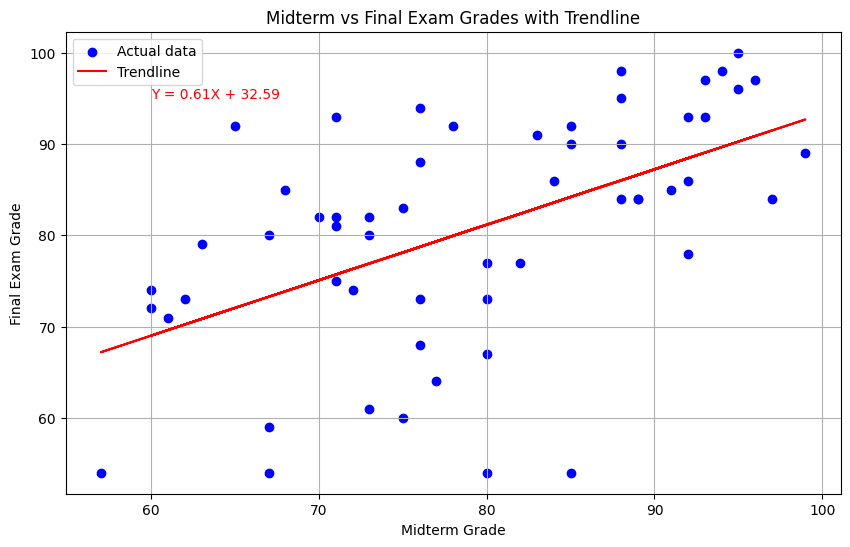

[75.69586085]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Input string data for student grades
data_str = """
Student	Midterm	Final Exam
1	77	64
2	83	91
3	80	67
4	89	84
5	75	60
6	67	80
7	76	73
8	93	93
9	67	59
10	91	85
11	80	54
12	88	84
13	85	54
14	62	73
15	92	86
16	76	88
17	70	82
18	92	93
19	80	77
20	61	71
21	68	85
22	72	74
23	60	74
24	67	54
25	76	94
26	73	80
27	99	89
28	57	54
29	82	77
30	71	82
31	76	68
32	94	98
33	71	93
34	71	81
35	73	82
36	96	97
37	73	61
38	89	84
39	95	96
40	85	90
41	60	72
42	65	92
43	97	84
44	84	86
45	88	98
46	93	97
47	78	92
48	85	92
49	92	78
50	75	83
51	95	100
52	80	73
53	63	79
54	71	75
55	88	90
56	88	95
"""

data_str = data_str.replace("\t",",")

# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Prepare the data for linear regression
X = data['Midterm'].values.reshape(-1, 1)  # Midterm grades
y = data['Final Exam'].values  # Final Exam grades

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict final exam scores based on midterm scores
y_pred = model.predict(X)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Midterm'], data['Final Exam'], color='blue', label='Actual data')
plt.plot(data['Midterm'], y_pred, color='red', label='Trendline')

# Add labels and title
plt.xlabel('Midterm Grade')
plt.ylabel('Final Exam Grade')
plt.title('Midterm vs Final Exam Grades with Trendline')

# Add the trendline equation
slope = model.coef_[0]
intercept = model.intercept_
plt.text(60, 95, f'Y = {slope:.2f}X + {intercept:.2f}', color='red')

# Display the scatter plot
plt.legend()
plt.grid(True)
plt.show()

# Predict the final exam grade for a student who scored 78 on the midterm
midterm_score = 71

predicted_final_grade = model.predict([[midterm_score]])

print(predicted_final_grade)


In [3]:
# Output the slope and intercept rounded to three decimal places
slope_rounded = round(slope, 3)
intercept_rounded = round(intercept, 3)

model_equation = f"Y = {slope_rounded}X + {intercept_rounded}"
model_equation


'Y = 0.607X + 32.595'

In [4]:
# Round the predicted final exam grade to the nearest whole number
predicted_final_grade_rounded = round(predicted_final_grade[0])
predicted_final_grade_rounded


76

## QUESTION 2

Error Category
-15,000 < e_i ≤ -10,000     0
-10,000 < e_i ≤ -5,000      6
-5,000 < e_i ≤ 0           20
0 < e_i ≤ 5,000             9
5,000 < e_i ≤ 10,000        6
10,000 < e_i ≤ 15,000       0
15,000 < e_i ≤ 20,000       1
Name: count, dtype: int64


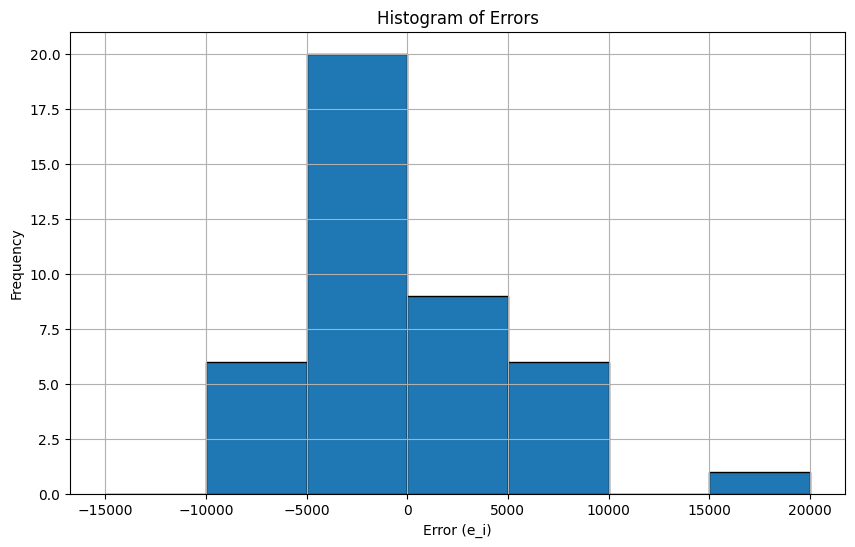

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input string data for square feet and market values
data_str = """
Square Feet	Market Value
1810	95100
1915	104400
1843	93400
1810	91100
1836	101800
2030	108400
1732	87500
1852	95900
1792	89300
1664	88500
1853	100800
1618	96600
1691	87500
2371	114000
2372	113300
1666	87600
2121	116200
1618	94600
1731	86400
1666	87100
1519	83400
1484	79900
1590	81500
1596	87200
1483	82600
1483	78800
1520	87700
1703	94300
1484	82000
1469	88000
1520	88200
1521	88500
1484	76600
1521	84400
1667	90800
1588	81000
1786	91200
1485	81300
1519	100600
1520	87100
1686	96700
1583	83400
"""
data_str = data_str.replace("\t",",")
# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Define the regression model given in the prompt: Market Value = 28750 + 37.013 * Square Feet
def predicted_market_value(square_feet):
    return 27598 + 37.527 * square_feet

# Calculate predicted market values
data['Predicted Market Value'] = data['Square Feet'].apply(predicted_market_value)

# Calculate errors (e_i = Y_i - Ŷ_i)
data['Error'] = data['Market Value'] - data['Predicted Market Value']

# Create frequency distribution for the errors
bins = [-15000, -10000, -5000, 0, 5000, 10000, 15000, 20000]
labels = ['-15,000 < e_i ≤ -10,000', '-10,000 < e_i ≤ -5,000', '-5,000 < e_i ≤ 0',
          '0 < e_i ≤ 5,000', '5,000 < e_i ≤ 10,000', '10,000 < e_i ≤ 15,000', '15,000 < e_i ≤ 20,000']
data['Error Category'] = pd.cut(data['Error'], bins=bins, labels=labels)

# Frequency distribution of the errors
frequency_distribution = data['Error Category'].value_counts().sort_index()

# Display the frequency distribution in the console
print(frequency_distribution)

# Plot the histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(data['Error'], bins=bins, edgecolor='black')
plt.xlabel('Error (e_i)')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.grid(True)
plt.show()


## QUESTION 3

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Input data for overhead costs and billable hours
data_str = """
Overhead Costs	Billable Hours
325000	2000
375000	3000
405000	4000
459000	5000
540000	6000
565000	7000
"""

data_str = data_str.replace("\t",",")

# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Prepare the data for linear regression
X = data['Billable Hours'].values.reshape(-1, 1)  # Independent variable (Billable Hours)
y = data['Overhead Costs'].values  # Dependent variable (Overhead Costs)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the constant (intercept) and coefficient (slope)
constant = round(model.intercept_, 1)
coefficient = round(model.coef_[0], 4)

# Output the model equation
constant, coefficient

print(f"Overhead=  {constant} Costs× {coefficient} Billable Hours")
print(constant)
print(coefficient)


Overhead=  219961.9 Costs× 49.9714 Billable Hours
219961.9
49.9714


## Part B

It is not appropriate to interpret b 0​, because its value is the predicted overhead costs for  0 billable​ hours, but someone with 0 billable hours would not actually be a client of the firm.

## Part C

For each increase of 1 unit in billable​ hours, the predicted overhead costs are estimated to increase by b 1.

## part D

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Input data for overhead costs and billable hours
# data_str = """
# Overhead Costs	Billable Hours
# 355000	3000
# 400000	4000
# 430000	5000
# 482000	6000
# 560000	7000
# 575000	8000
# """
data_str = data_str.replace("\t",",")
# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Prepare the data for linear regression
X = data['Billable Hours'].values.reshape(-1, 1)  # Independent variable (Billable Hours)
y = data['Overhead Costs'].values  # Dependent variable (Overhead Costs)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Define the number of billable hours for the special job
billable_hours_special_job = 6500

# Use the regression model to predict the overhead costs for 8500 billable hours
predicted_overhead_special_job = model.predict([[billable_hours_special_job]])

# Define the margin before overhead for the special job
margin_before_overhead = 340000

# Calculate if the job would be attractive (margin - predicted overhead costs)
profit_or_loss = margin_before_overhead - predicted_overhead_special_job[0]

# Determine if the job is attractive (profitable) or not
is_attractive = profit_or_loss > 0

predicted_overhead_special_job[0], is_attractive, round(profit_or_loss, 2)

print(round(predicted_overhead_special_job[0]))


544776


## QUESTION 4


### PART A

ALL ARE POSITIVE


### PART B

EITHER 2 OR 3


## QUESTION 5

In [8]:
import pandas as pd
import statsmodels.api as sm

# Input string data for Concert Sales, Radio/TV ads, and Newspaper ads
data_str = """
Sales ($1000)	Thousands of radio and TV ads	Thousands of newspaper ads
1112	0	38
965	0	38
866	25	24
597	25	26
948	30	32
964	30	31
978	34	37
1193	33	37
903	38	24
967	42	26
1677	45	44
1568	43	45
1065	52	48
915	50	51
1327	53	20
1338	55	20
1371	60	31
1452	61	31
1542	68	35
1669	62	33
1903	68	38
1702	73	40
"""

data_str = data_str.replace("\t",",")

# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Prepare the independent and dependent variables for regression
X = data[['Thousands of radio and TV ads']]  # Radio and TV ads as independent variable
y = data['Sales ($1000)']  # Sales as dependent variable

# Add a constant to the independent variable (for intercept in the regression model)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the regression model summary
model_summary = model.summary()

# Extract R-squared, p-values, and the coefficients
r_squared = model.rsquared
p_values = model.pvalues
coefficients = model.params

r_squared, p_values, coefficients, model_summary


(np.float64(0.46678577420779643),
 const                            0.000028
 Thousands of radio and TV ads    0.000457
 dtype: float64,
 const                            720.188329
 Thousands of radio and TV ads     11.803439
 dtype: float64,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          Sales ($1000)   R-squared:                       0.467
 Model:                            OLS   Adj. R-squared:                  0.440
 Method:                 Least Squares   F-statistic:                     17.51
 Date:                Mon, 16 Dec 2024   Prob (F-statistic):           0.000457
 Time:                        13:27:19   Log-Likelihood:                -152.37
 No. Observations:                  22   AIC:                             308.7
 Df Residuals:                      20   BIC:                             310.9
 Df Model:                           1                            

In [9]:
# Extract the F-statistic value from the model summary and round to three decimal places
f_statistic = round(model.f_pvalue, 3)
print(f_statistic)


0.0


In [11]:
# Prepare the independent variable for Newspaper ads
X_newspaper = data[['Thousands of newspaper ads']]  # Newspaper ads as independent variable
X_newspaper = sm.add_constant(X_newspaper)

# Fit the linear regression model for Newspaper ads
model_newspaper = sm.OLS(y, X_newspaper).fit()

# Extract the constant and coefficient
coefficients_newspaper = model_newspaper.params
# Round the constant and coefficient to three decimal places
constant_newspaper = round(coefficients_newspaper['const'], 4)
coefficient_newspaper = round(coefficients_newspaper['Thousands of newspaper ads'], 4)

print(constant_newspaper, coefficient_newspaper)


901.0315 9.6119


In [12]:
# Extract R-squared value for the newspaper ads model
r_squared_newspaper = round(model_newspaper.rsquared, 3)
print(r_squared_newspaper)


0.058


In [13]:
# Extract the p-value (Significance F) from the newspaper ads model and round to three decimal places
p_value_newspaper = round(model_newspaper.f_pvalue, 3)
print(p_value_newspaper)


0.282


In [14]:
# Prepare the independent variables for Radio & TV ads and Newspaper ads
X_both = data[['Thousands of radio and TV ads', 'Thousands of newspaper ads']]  # Both as independent variables
X_both = sm.add_constant(X_both)

# Fit the multiple linear regression model
model_both = sm.OLS(y, X_both).fit()

# Extract the coefficients for the model (constant, Radio & TV, Newspaper)
coefficients_both = model_both.params

# Round the coefficients to three decimal places
constant_both = round(coefficients_both['const'], 3)
coefficient_radio_tv = round(coefficients_both['Thousands of radio and TV ads'], 3)
coefficient_newspaper_both = round(coefficients_both['Thousands of newspaper ads'], 3)

print(constant_both, coefficient_radio_tv, coefficient_newspaper_both)


447.356 11.623 8.242


In [16]:
# Extract the R-squared value for the combined Radio & TV and Newspaper ads model
r_squared_both = round(model_both.rsquared, 3)
print(r_squared_both)


0.509


In [17]:
# Extract the p-value (Significance F) for the combined model and round to three decimal places
f_statistic_both = round(model_both.f_pvalue, 3)
print(f_statistic_both)


0.001


In [18]:
# Extract the p-value (Significance F) for the combined model and round to three decimal places
f_statistic_both = round(model_both.f_pvalue, 3)
print(f_statistic_both)


0.001


In [19]:
# Extract the p-value for the Newspaper ads variable and round to three decimal places
p_value_newspaper_both = round(model_both.pvalues['Thousands of newspaper ads'], 3)
print(p_value_newspaper_both)


0.217


lesss than 
reject
is 
one variable


## QUESTION 6

In [20]:
import pandas as pd
import statsmodels.api as sm

# Input string data for House Age, Square Feet, and Market Value
data_str = """
House Age	Square Feet	Market Value
32	1899	86694
30	1969	100158
31	1892	89421
33	1852	89207
31	1871	97231
31	1973	110851
30	1650	89722
31	1912	99210
34	1803	89242
32	1672	88310
34	1848	105194
34	1604	92100
34	1630	86219
31	2371	116050
34	2448	110281
33	1632	83916
32	2074	117659
33	1674	90022
30	1793	83716
33	1740	90260
27	1466	82209
26	1506	80896
28	1650	79672
27	1546	89626
28	1440	78751
29	1410	76519
29	1462	90787
26	1658	97042
27	1504	83516
29	1448	91246
27	1579	88981
26	1506	90910
26	1419	79049
27	1492	83115
27	1695	91423
29	1587	85008
29	1698	90881
28	1457	79407
28	1524	96901
27	1541	89628
26	1730	99592
27	1637	115133
"""

data_str = data_str.replace("\t",",")

# Convert string to a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(data_str))

# Prepare the independent variables (House Age and Square Feet) and dependent variable (Market Value)
X = data[['House Age', 'Square Feet']]
y = data['Market Value']

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Extract the coefficients for the model (constant, House Age, Square Feet)
coefficients = model.params

# Round the coefficients to three decimal places
constant = round(coefficients['const'], 3)
coefficient_age = round(coefficients['House Age'], 3)
coefficient_size = round(coefficients['Square Feet'], 3)

print(constant, coefficient_age, coefficient_size)


51921.628 -768.847 36.949


In [21]:
# Extract the R-squared value from the model and round to three decimal places
r_squared = round(model.rsquared, 3)
print(r_squared)


0.548


In [22]:
# Extract the p-value (Significance F) from the model and round to three decimal places
f_statistic = round(model.f_pvalue, 3)
print(f_statistic)


0.0


In [24]:
# Extract the p-value for the Age variable and round to three decimal places
p_value_age = round(model.pvalues['House Age'], 4)
print(p_value_age)


0.1329


In [26]:
# Extract the p-value for the Size variable and round to three decimal places
p_value_size = round(model.pvalues['Square Feet'], 3)
print(p_value_size)


0.0


both variables

## QUESTION 7

In [27]:
# Importing necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from io import StringIO

# Original data in string format
data_string = """
House Age	Square Feet	Market Value
35	1797	91274
32	1820	99420
32	1843	96895
32	1791	87294
32	1799	104290
33	2108	105812
30	1780	85896
35	1854	92442
32	1871	85941
35	1603	90150
32	1851	97553
33	1550	93809
31	1767	85244
30	2401	116166
34	2475	115132
32	1667	88904
32	2189	116447
32	1620	97343
31	1785	90052
30	1594	89471
28	1518	84893
27	1450	75974
28	1521	78162
29	1551	86068
27	1532	80791
29	1541	76720
27	1542	87101
28	1740	91728
28	1436	83179
29	1437	91315
28	1517	89158
26	1543	92736
27	1557	75692
28	1595	83233
27	1685	86790
28	1521	84582
29	1851	91148
27	1543	79188
27	1586	98695
27	1527	85206
28	1678	99425
26	1521	122975
"""

# Convert the string into a DataFrame
data = StringIO(data_string)
df = pd.read_csv(data, sep='\t')

# Check for missing or invalid data
print("Check for NaN values:\n", df.isna().sum())

# If there are any NaN values, we drop them (you can also choose to fill them with a specific value)
df.dropna(inplace=True)

# Rename the columns to the desired format
df.columns = ['House_Age', 'Square_Feet', 'Market_Value']

# Define the predictors (Square Feet) and the response variable (Market Value)
X_size_only = df[['Square_Feet']]
y = df['Market_Value']

# Fitting the simple linear regression model
model_size_only = LinearRegression()
model_size_only.fit(X_size_only, y)

# Getting the coefficients and intercept for the model
intercept_size_only = model_size_only.intercept_
coefficient_size_only = model_size_only.coef_[0]

# Predicting for user-input house sizes (in this case, 1700 and 2300)
house_size_1 = 1700
house_size_2 = 2900

# Making predictions
prediction_size_1 = model_size_only.predict([[house_size_1]])
prediction_size_2 = model_size_only.predict([[house_size_2]])

# Outputting the results
print("Intercept:", round(intercept_size_only, 3))
print("Coefficient:", round(coefficient_size_only, 3))
print("Prediction for house size 1700:", round(prediction_size_1[0], 2))
print("Prediction for house size 2300:", round(prediction_size_2[0], 2))


Check for NaN values:
 House Age       0
Square Feet     0
Market Value    0
dtype: int64
Intercept: 39341.268
Coefficient: 30.772
Prediction for house size 1700: 91653.88
Prediction for house size 2300: 128580.42


c:\Users\brett\OneDrive\Desktop\Goal\Course\Business Analytics\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\brett\OneDrive\Desktop\Goal\Course\Business Analytics\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## QUESTION 8

In [28]:
# Importing necessary libraries
from io import StringIO
import pandas as pd
from statsmodels.api import OLS, add_constant

# The cleaned string data
data_string = """
Credit Score	Years of Credit History	Revolving Balance ($)	Revolving Utilization (%)
725	20	11320	0.25
573	9	7200	0.70
677	11	20000	0.55
625	15	12800	0.65
527	12	5700	0.75
795	22	9000	0.12
733	7	35200	0.20
620	5	22800	0.62
591	17	16500	0.50
660	24	9200	0.35
700	19	22000	0.18
500	16	12500	0.83
565	6	7700	0.70
620	3	37400	0.87
774	13	6100	0.07
802	10	10500	0.05
640	7	17300	0.59
523	14	27000	0.79
811	20	13400	0.03
763	2	11200	0.70
555	4	2500	1.00
617	9	8400	0.34
642	13	16000	0.25
688	3	3300	0.11
649	12	7500	0.05
695	15	20300	0.22
701	9	11700	0.15
635	7	29100	0.85
507	2	2000	1.00
677	12	7600	0.09
485	5	1000	0.80
582	3	8500	0.65
699	17	12800	0.27
703	22	10000	0.20
585	18	31000	0.78
620	8	16200	0.55
695	16	9700	0.11
774	13	6100	0.07
802	10	10500	0.05
640	7	17300	0.59
536	14	27000	0.79
801	20	13400	0.03
760	2	11200	0.70
567	4	2200	0.95
600	10	12050	0.81
702	11	11700	0.15
636	8	29100	0.85
509	3	2000	1.00
595	18	29000	0.78
733	15	13000	0.24
"""

# Using StringIO to read the string as if it were a file
data = StringIO(data_string)

# Reading the data into a DataFrame with appropriate column names
df = pd.read_csv(data, sep="\t")


# Performing a simple linear regression using only Revolving Utilization (%)
X_utilization_only = df[['Revolving Utilization (%)']]
X_utilization_only = add_constant(X_utilization_only)  # Adding a constant for intercept
y = df['Credit Score']

# Fitting the linear regression model with utilization as the only predictor
model_utilization_only = OLS(y, X_utilization_only).fit()

# Getting the coefficients and intercept for the model
summary_utilization_only = model_utilization_only.summary()

summary_utilization_only


# Extracting the intercept and coefficient for Utilization
intercept_utilization = model_utilization_only.params['const']
coef_utilization = model_utilization_only.params['Revolving Utilization (%)']

# Formatting the equation string
equation = f"Credit Score = {intercept_utilization:.3f} + ({coef_utilization:.3f} × Utilization)"

equation



'Credit Score = 757.922 + (-220.732 × Utilization)'

## part B

In [29]:
# Performing multiple linear regression using all predictors (Years, Balance, and Utilization)
X_full = df[['Years of Credit History', 'Revolving Balance ($)', 'Revolving Utilization (%)']]
X_full = add_constant(X_full)  # Adding a constant for intercept
y = df['Credit Score']

# Fitting the multiple linear regression model
model_full = OLS(y, X_full).fit()

# Extracting the coefficients and intercept for the correct model
intercept_full = model_full.params['const']
coef_years = model_full.params['Years of Credit History']
coef_balance = model_full.params['Revolving Balance ($)']
coef_utilization_full = model_full.params['Revolving Utilization (%)']

# Formatting the equation string for the full model
equation_full = f"Credit Score = {intercept_full:.3f} + ({coef_years:.3f} × Years) + ({coef_balance:.3f} × Balance) + ({coef_utilization_full:.3f} × Utilization)"

equation_full


'Credit Score = 771.892 + (-2.098 × Years) + (0.002 × Balance) + (-246.228 × Utilization)'

In [30]:
# Calculating the R-squared for the full model (with all predictors)
r_squared_full = model_full.rsquared

# Calculating the R-squared for the simpler model (with only Utilization)
r_squared_utilization_only = model_utilization_only.rsquared

print(round(r_squared_utilization_only,3))

print(round(r_squared_full,3))




0.634
0.665




"The first model's \( R^2 \) value is 0.628, which is **less than** the second model's \( R^2 \) value of 0.649. Therefore, based on the \( R^2 \) values, the better model is the **second** model. 

The principle of parsimony **applies** because the \( R^2 \) values **are** close (that is, they differ by **less than** 0.05), so the better model is the **first**."



## QUESTION 9

In [31]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from io import StringIO

# Data in string format
data_string = """
Type	Sales_Price	Lot_Cost
Townhouse	111540	19500
Single Family	135330	24300
Townhouse	146705	23450
Single Family	168800	24000
Townhouse	180716	43825
Townhouse	186190	25800
Single Family	187920	33800
Townhouse	195698	43825
Townhouse	201876	43825
Single Family	204621	38099
Single Family	213005	35300
Townhouse	249600	72200
Single Family	253800	41998
Single Family	266800	42144
Single Family	267300	39899
Single Family	269905	43800
Single Family	276520	43450
Single Family	293790	55800
Single Family	300300	57800
Single Family	306187	44650
Single Family	311698	39568
Single Family	318402	81050
Single Family	323212	61323
Single Family	336174	69199
Single Family	336180	47950
Single Family	336865	53650
Single Family	352917	55019
Single Family	358749	49391
Single Family	431226	56222
Single Family	491620	82922
"""

# Use StringIO to read the string as if it were a file
data = StringIO(data_string)

# Read the data into a pandas DataFrame
df = pd.read_csv(data, sep='\t')

# Create the dummy variable for Townhouse (1 for Townhouse, 0 for Single Family)
df['Townhouse'] = df['Type'].apply(lambda x: 1 if x == 'Townhouse' else 0)

# Define the dependent variable (Sales Price) and independent variables (Lot Cost and Townhouse)
X = df[['Lot_Cost', 'Townhouse']]
y = df['Sales_Price']

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Create the regression model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Get the regression coefficients
intercept = round(results.params['const'],)
lot_cost_coeff = round(results.params['Lot_Cost'], 2)
townhouse_coeff = round(results.params['Townhouse'],)

# Print the regression equation in the required format
print(f"Sales Price = {intercept} + ({lot_cost_coeff}) * Lot Cost + ({townhouse_coeff}) * Townhouse")


Sales Price = 113483 + (3.68) * Lot Cost + (-75103) * Townhouse


In [32]:
# Create the dummy variable for Townhouse (1 for Townhouse, 0 for Single Family)
df['Townhouse'] = df['Type'].apply(lambda x: 1 if x == 'Townhouse' else 0)

# Define the dependent variable (Sales Price) and independent variables (Lot Cost, Townhouse, and interaction)
df['Lot_Cost_Townhouse'] = df['Lot_Cost'] * df['Townhouse']

# Define independent variables (Lot Cost, Townhouse, and interaction)
X = df[['Lot_Cost', 'Townhouse', 'Lot_Cost_Townhouse']]
y = df['Sales_Price']

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Create and fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression
summary = model.summary()
print(summary)

# Extract p-values of the independent variables and the interaction term
p_value_lot_cost = model.pvalues['Lot_Cost']
p_value_townhouse = model.pvalues['Townhouse']
p_value_interaction = model.pvalues['Lot_Cost_Townhouse']

# Print the p-values
print(f"P-value for Lot Cost: {p_value_lot_cost:.3f}")
print(f"P-value for Townhouse: {p_value_townhouse:.3f}")
print(f"P-value for Lot Cost * Townhouse (Interaction Term): {p_value_interaction:.3f}")

# Determine if an interaction exists based on the p-value of the interaction term
alpha = 0.1
if p_value_interaction < alpha:
    print(f"An interaction exists because the p-value of the interaction term Lot Cost * Townhouse is {p_value_interaction:.3f}, which is less than alpha ({alpha}).")
else:
    print(f"No interaction exists because the p-value of the interaction term Lot Cost * Townhouse is {p_value_interaction:.3f}, which is greater than alpha ({alpha}).")

                            OLS Regression Results                            
Dep. Variable:            Sales_Price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     27.67
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           2.98e-08
Time:                        13:45:37   Log-Likelihood:                -361.90
No. Observations:                  30   AIC:                             731.8
Df Residuals:                      26   BIC:                             737.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8.489e+04   3.22

In [33]:
# Use StringIO to read the string as if it were a file
data = StringIO(data_string)

# Read the data into a pandas DataFrame
df = pd.read_csv(data, sep='\t')

# Create the dummy variable for Townhouse (1 for Townhouse, 0 for Single Family)
df['Townhouse'] = df['Type'].apply(lambda x: 1 if x == 'Townhouse' else 0)

# Create the interaction term between Lot Cost and Townhouse
df['Lot_Cost_Townhouse'] = df['Lot_Cost'] * df['Townhouse']

# Define the predictors (Lot Cost, Townhouse, and the interaction term)
X = df[['Lot_Cost', 'Townhouse', 'Lot_Cost_Townhouse']]
X = sm.add_constant(X)  # Add constant for intercept

# Define the response variable
y = df['Sales_Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

# Extract the coefficients of the model
intercept = round(model.params['const'], 0)
lot_cost_coeff = round(model.params['Lot_Cost'], 2)
townhouse_coeff = round(model.params['Townhouse'], 0)
interaction_coeff = round(model.params['Lot_Cost_Townhouse'], 2)

# Print the regression equation in the required format
print(f"Sales Price = {intercept} + ({townhouse_coeff}) • Townhouse + ({lot_cost_coeff}) • Lot Cost + ({interaction_coeff}) • Lot Cost • Townhouse")
# Use StringIO to read the string as if it were a file


                            OLS Regression Results                            
Dep. Variable:            Sales_Price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     27.67
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           2.98e-08
Time:                        13:46:28   Log-Likelihood:                -361.90
No. Observations:                  30   AIC:                             731.8
Df Residuals:                      26   BIC:                             737.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8.489e+04   3.22

In [34]:
# Use StringIO to read the string as if it were a file
data = StringIO(data_string)

# Read the data into a pandas DataFrame

df = pd.read_csv(data, sep='\t')

# Create the dummy variable for Townhouse (1 for Townhouse, 0 for Single Family)
df['Townhouse'] = df['Type'].apply(lambda x: 1 if x == 'Townhouse' else 0)

# Create the interaction term between Lot Cost and Townhouse
df['Lot_Cost_Townhouse'] = df['Lot_Cost'] * df['Townhouse']

# Define the predictors (Lot Cost, Townhouse, and the interaction term)
X = df[['Lot_Cost', 'Townhouse', 'Lot_Cost_Townhouse']]
X = sm.add_constant(X)  # Add constant for intercept

# Define the response variable
y = df['Sales_Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extract the coefficients of the model
intercept = model.params['const']
lot_cost_coeff = model.params['Lot_Cost']
townhouse_coeff = model.params['Townhouse']
interaction_coeff = model.params['Lot_Cost_Townhouse']

# Predicted sales price for a single-family home
def predict_single_family_home(lot_cost):
    townhouse = 0
    lot_cost_townhouse = lot_cost * townhouse
    predicted_price = intercept + (townhouse_coeff * townhouse) + (lot_cost_coeff * lot_cost) + (interaction_coeff * lot_cost_townhouse)
    return predicted_price

# Predicted sales price for a townhouse
def predict_townhouse(lot_cost):
    townhouse = 1
    lot_cost_townhouse = lot_cost * townhouse
    predicted_price = intercept + (townhouse_coeff * townhouse) + (lot_cost_coeff * lot_cost) + (interaction_coeff * lot_cost_townhouse)
    return predicted_price

# Example: Predict sales price for a single-family home with Lot Cost of $40,000
lot_cost_single_family = 28900
predicted_price_single_family = predict_single_family_home(lot_cost_single_family)

# Example: Predict sales price for a townhouse with Lot Cost of $40,000
lot_cost_townhouse = 28900
predicted_price_townhouse = predict_townhouse(lot_cost_townhouse)

# Print the predicted prices, rounded to the nearest cent
print(f"The predicted sales price for a single-family home with a lot cost of ${lot_cost_single_family:,.2f} is: ${round(predicted_price_single_family)}")
print(f"The predicted sales price for a townhouse with a lot cost of ${lot_cost_townhouse:,.2f} is: ${round(predicted_price_townhouse)}")

The predicted sales price for a single-family home with a lot cost of $28,900.00 is: $208313
The predicted sales price for a townhouse with a lot cost of $28,900.00 is: $160041


### QUESTION 10

Cost = 8233 + (15) Units Produced
R-squared: 0.9680


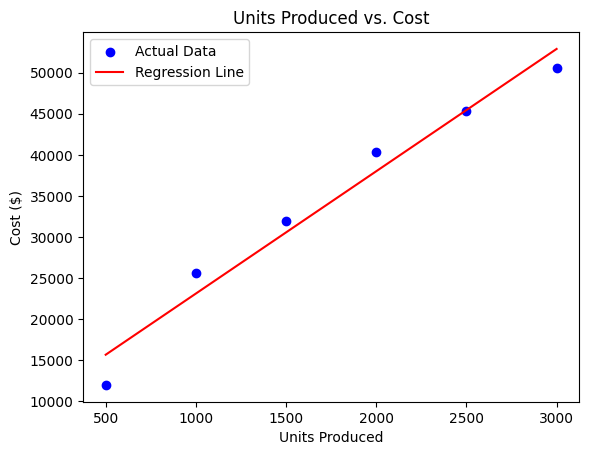

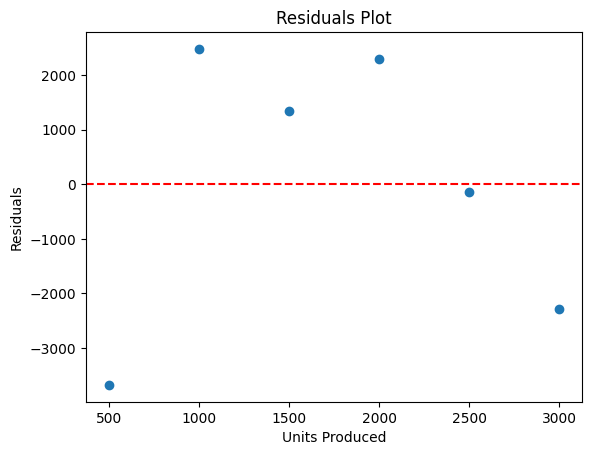

In [35]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data in string format
data_string = """
Units_Produced	Cost
500	12,000
1000	25,600
1500	31,900
2000	40,300
2500	45,300
3000	50,600
"""

data_string = data_string.replace(",","").replace("\t",",")

# Convert the data into a pandas DataFrame
from io import StringIO
data = StringIO(data_string)
df = pd.read_csv(data)

# Defining the predictors (Units Produced) and the response variable (Cost)
X = df[['Units_Produced']]  # Predictor
y = df['Cost']  # Response variable

# Applying the Simple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Getting the intercept and slope (coefficient)
intercept = model.intercept_
slope = model.coef_[0]

# Predicting the Cost based on the linear model
y_pred = model.predict(X)

# Calculate R-squared value
r2 = r2_score(y, y_pred)

# Output the regression equation
print(f"Cost = {round(intercept)} + ({round(slope)}) Units Produced")
print(f"R-squared: {r2:.4f}")

# Plotting the scatter plot with regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')

# Adding titles and labels
plt.title('Units Produced vs. Cost')
plt.xlabel('Units Produced')
plt.ylabel('Cost ($)')
plt.legend()

# Show the plot
plt.show()

# Residual plot (difference between actual and predicted)
residuals = y - y_pred
plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Units Produced')
plt.ylabel('Residuals')
plt.show()


a nonlinear shape.​, cannot

Cost = (-0.004) * Units_Produced^2 + (27.692) * Units_Produced + (370.0)
R-squared: 0.9987


c:\Users\brett\OneDrive\Desktop\Goal\Course\Business Analytics\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


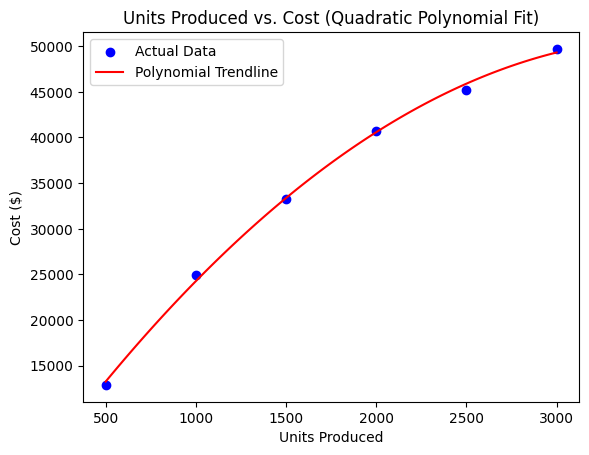

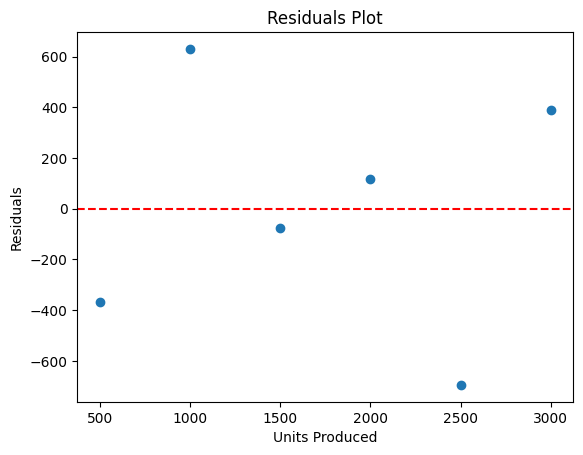

In [39]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data in string format
data_string = """
Units_Produced	Cost
500	12,900
1000	24,900
1500	33,300
2000	40,700
2500	45,200
3000	49,700
"""

data_string = data_string.replace(",","").replace("\t",",")
# Convert the data into a pandas DataFrame
from io import StringIO
data = StringIO(data_string)
df = pd.read_csv(data)

# Defining the predictors (Units Produced) and the response variable (Cost)
X = df[['Units_Produced']]  # Predictor
y = df['Cost']  # Response variable

# Applying Polynomial Features of degree 2 (for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Transform X to include X and X^2 (quadratic term)

# Applying the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y)

# Getting the coefficients and intercept for the polynomial model
intercept = model.intercept_
coefficients = model.coef_

# Predicting the Cost based on the polynomial model
y_pred = model.predict(X_poly)

# Calculate R-squared value
r2 = r2_score(y, y_pred)

# Output the regression equation
print(f"Cost = ({round(coefficients[2], 3)}) * Units_Produced^2 + ({round(coefficients[1], 3)}) * Units_Produced + ({round(intercept, 3)})")
print(f"R-squared: {r2:.4f}")

# Plotting the scatter plot with the polynomial regression line
plt.scatter(X, y, color='blue', label='Actual Data')

# Generate a smooth curve for the polynomial trendline
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Trendline')

# Adding titles and labels
plt.title('Units Produced vs. Cost (Quadratic Polynomial Fit)')
plt.xlabel('Units Produced')
plt.ylabel('Cost ($)')
plt.legend()

# Show the plot
plt.show()

# Residual plot (difference between actual and predicted)
residuals = y - y_pred
plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Units Produced')
plt.ylabel('Residuals')
plt.show()



## QUESTION 13

In [1]:
import pandas as pd
import statsmodels.api as sm

# Data for weddings paid by Bride and Groom only
data = {
    'Couple\'s Income': [98000, 72000, 90000, 43000, 100000, 75000, 53000, 45000],
    'Wedding Cost': [47000, 42000, 30500, 30000, 30000, 24000, 14000, 5000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Independent variable (X) and dependent variable (Y)
X = df['Couple\'s Income']
Y = df['Wedding Cost']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the summary of the regression results
regression_summary = model.summary()

# Extracting R-squared value
r_squared = model.rsquared

# Display regression summary and R-squared
regression_summary, round(r_squared * 100, 2)


c:\Users\brett\OneDrive\Desktop\Goal\Course\Business Analytics\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           Wedding Cost   R-squared:                       0.408
 Model:                            OLS   Adj. R-squared:                  0.309
 Method:                 Least Squares   F-statistic:                     4.136
 Date:                Mon, 21 Oct 2024   Prob (F-statistic):             0.0882
 Time:                        00:11:30   Log-Likelihood:                -84.915
 No. Observations:                   8   AIC:                             173.8
 Df Residuals:                       6   BIC:                             174.0
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------------------------------------------